In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from features_engineering import WaveletTransformer

https://www.intechopen.com/chapters/74032

In [2]:
# define file path 
file_path = "./../data/training_records/dreem_4.npy"

# load data
data = np.load(file_path)
df = pd.DataFrame(data)
df.set_index(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 833 entries, 0.0 to 832.0
Columns: 42000 entries, 1 to 42000
dtypes: float64(42000)
memory usage: 266.9 MB


In [3]:
category = {
    "First_EEG": (1, 7501, 250), 
    "Second_EEG": (7501, 15001, 250), 
    "Third_EEG": (15001, 22501, 250), 
    "Fourth_EEG": (22501, 30001, 250), 
    "Fifth_EEG": (30001, 37501, 250), 
    "X_axis": (37501, 39001, 50), 
    "Y_axis": (39001, 40501, 50), 
    "Z_axis": (40501, 42001, 50) 
}

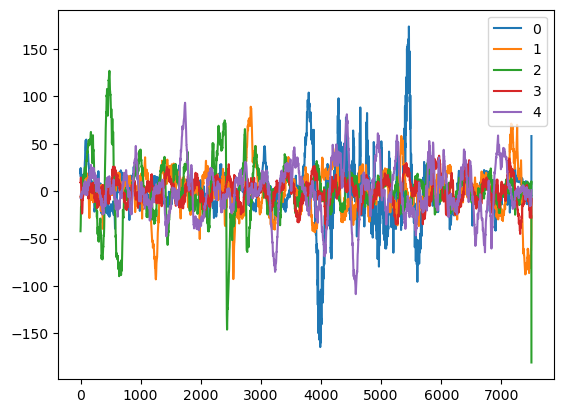

In [13]:
min_, max_, sampling_rate = category["Third_EEG"]

for i in range(5):
    plt.plot(list(df.iloc[i, min_:max_]), label=i)

plt.legend()

### Experiment wavelet transformer

In [26]:
scales = np.logspace(1, 5, base=2)

transformer = WaveletTransformer(sampling_rate=sampling_rate, 
                                 scales=scales)

In [27]:
2**5

32

In [30]:
eeg_data = df.iloc[268, min_:max_]
coeff, freq = transformer.wavelet_features(eeg_data)

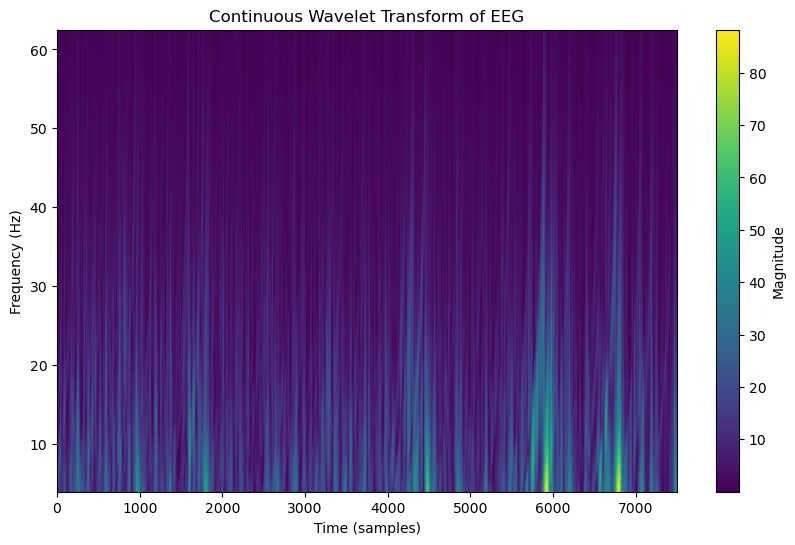

In [31]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeff), aspect='auto', extent=[0, len(eeg_data), freq[-1], freq[0]])
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform of EEG')
plt.xlabel('Time (samples)')
plt.ylabel('Frequency (Hz)')
plt.show()